# Customer Satisfaction Classification


<b>Author</b>: Abhishek Dutta

<b>Email</b>: abhishek.dutta1337@gmail.com


### Task 1. Data Preparation

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_bank_tabular = pd.read_csv('bank-data/bank-tabular.csv', sep='\t')

The tabular dataset consists of the following fields:

 - customer_id: A unique identifier for each customer.
 - date: The date on which the survey was conducted.
 - customer_gender: The gender of the customer.
 - customer_age: The age of the customer.
 - customer_location: The location of the customer in Ireland.
 - customer_type: The type of the customer.
 - has_cc: Indicates whether or not the customer has a credit card with the bank.
 - has_mortgage: Indicates whether or not the customer has a mortgage with the bank.
 - convenience: The customer's rating score (1-5) for the availability and accessibility of the bank. Customers want their bank to be easily accessible through multiple channels such as branches and ATMs.
 - customer_service: A rating score (1-5) for customer service, including response time, friendliness, and competence of bank staff.
 - online_banking: A score (1-5) for the ease of use, functionality, and availability of online banking services
 - interest_rates: A score (1-5), where customers may be more satisfied with their bank if they offer competitive interest rates on savings and mortgages.
 - fees_charges: A score (1-5), where customers may be more dissatisfied when they are charged fees for services they did not expect, or when the fees/charges are high.
 - community_involvement: A score (1-5), where customers may have a more favorable view of their bank if they are involved in the local community and support charitable causes.
 - products_services: A score (1-5) which relates to the quality and variety of products and services offered by the bank.
 - privacy_security: The customer's score (1-5) reflecting whether customers believe their bank provides high levels of security and privacy, and manage their personal data carefully.
 - reputation: A score (1-5) indicating whether customers believe their bank has a good reputation for reliability and ethical practices.
 - satisfied: A manually-assigned boolean value indicating whether a customer is satisfied overall with their bank.



In [3]:
df_bank_tabular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3000 non-null   int64  
 1   date                   3000 non-null   object 
 2   customer_gender        2688 non-null   object 
 3   customer_age           2530 non-null   float64
 4   customer_location      2635 non-null   object 
 5   customer_type          3000 non-null   object 
 6   has_cc                 3000 non-null   bool   
 7   has_mortgage           3000 non-null   bool   
 8   convenience            2936 non-null   float64
 9   customer_service       2971 non-null   float64
 10  online_banking         2970 non-null   float64
 11  interest_rates         2835 non-null   float64
 12  fees_charges           2924 non-null   float64
 13  community_involvement  2700 non-null   float64
 14  products_services      2900 non-null   float64
 15  priv

In [4]:
df_bank_tabular.head(5)

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,58770,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False


### Converting 'date' column to a date datatype

In [5]:
df_bank_tabular['date'] = pd.to_datetime(df_bank_tabular['date'], format='%Y-%m-%d')

### Analysis and handling of missing values

Total number of records having missing values across different columns

In [6]:
df_bank_tabular.isna().sum()

customer_id                0
date                       0
customer_gender          312
customer_age             470
customer_location        365
customer_type              0
has_cc                     0
has_mortgage               0
convenience               64
customer_service          29
online_banking            30
interest_rates           165
fees_charges              76
community_involvement    300
products_services        100
privacy_security         262
reputation               402
satisfied                  0
dtype: int64

<b>Distribution of gender values

In [7]:
df_bank_tabular['customer_gender'].value_counts(dropna=False)

Female           1124
Male             1057
NaN               312
Not specified     221
f                 134
m                 118
Unspecified        34
Name: customer_gender, dtype: int64

<b>Distribution of location values

In [8]:
df_bank_tabular['customer_location'].value_counts(dropna=False)

Leinster    1248
Munster      777
Connacht     379
NaN          365
Ulster       231
Name: customer_location, dtype: int64

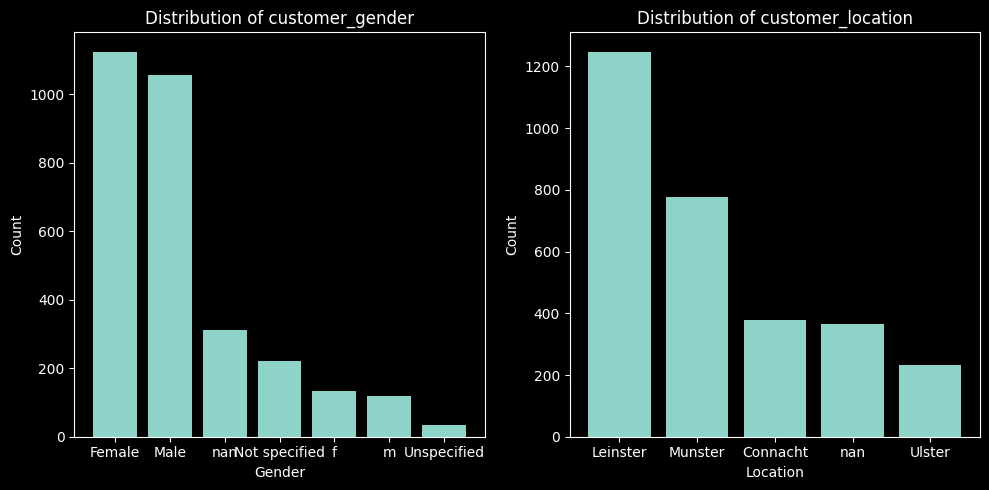

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.bar(df_bank_tabular['customer_gender'].value_counts(dropna=False).index.astype('str'),df_bank_tabular['customer_gender'].value_counts(dropna=False).values)
ax1.set_title('Distribution of customer_gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

ax2.bar(df_bank_tabular['customer_location'].value_counts(dropna=False).index.astype('str'),df_bank_tabular['customer_location'].value_counts(dropna=False).values)
ax2.set_title('Distribution of customer_location')
ax2.set_xlabel('Location')
ax2.set_ylabel('Count')
fig.tight_layout()

From the above, we can see that customer_gender and customer_location are text features having missing values.

We will impute the missing values for customer gender and location with their corresponding mode (most frequently occurring value)

In [10]:
gender_mode = df_bank_tabular['customer_gender'].mode()[0]
location_mode = df_bank_tabular['customer_location'].mode()[0]

df_bank_tabular['customer_gender'].fillna(gender_mode, inplace=True)
df_bank_tabular['customer_location'].fillna(location_mode, inplace=True)

For age column, let's have a look at its distribution first

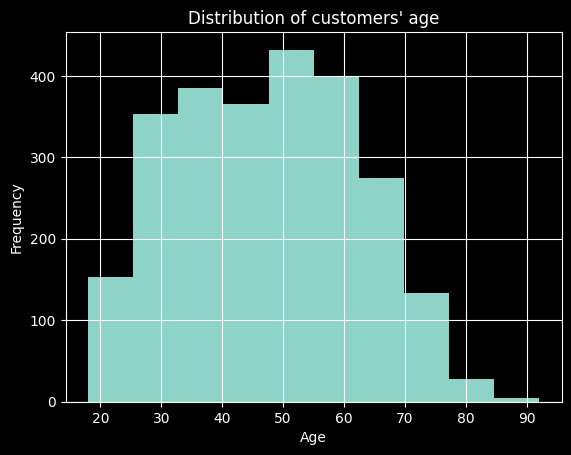

In [11]:
df_bank_tabular['customer_age'].hist()
plt.title('Distribution of customers\' age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Based on the above plot, we can safely impute missing age values with the average.

In [12]:
df_bank_tabular['customer_age'].fillna(value=round(df_bank_tabular['customer_age'].mean()), inplace=True)

In [13]:
df_bank_tabular.describe()

,customer_id,customer_age,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation
count,3000.000000,3000.000000,2936.000000,2971.000000,2970.000000,2835.000000,2924.000000,2700.000000,2900.000000,2738.000000,2598.000000
mean,193790.953667,47.237667,2.712534,2.782565,3.139394,3.163316,3.139877,3.170741,3.377931,3.391892,3.092379
std,113369.592794,13.458760,1.224867,1.260049,1.270211,1.253560,1.345764,1.331396,1.246975,1.257568,1.306927
min,26.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,96685.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,193998.500000,47.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000
75%,292016.500000,56.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,389602.000000,92.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The remaining numeric columns that have missing values are the survey rating features such as convenience, customer service and so on.

These features have values ranging from 1 to 5 only. 

We will impute missing values by their mean values rounded off.

In [14]:
df_bank_tabular['convenience'].fillna(value=round(df_bank_tabular['convenience'].mean()), inplace=True)
df_bank_tabular['customer_service'].fillna(value=round(df_bank_tabular['customer_service'].mean()), inplace=True)
df_bank_tabular['online_banking'].fillna(value=round(df_bank_tabular['online_banking'].mean()), inplace=True)
df_bank_tabular['interest_rates'].fillna(value=round(df_bank_tabular['interest_rates'].mean()), inplace=True)
df_bank_tabular['fees_charges'].fillna(value=round(df_bank_tabular['fees_charges'].mean()), inplace=True)
df_bank_tabular['community_involvement'].fillna(value=round(df_bank_tabular['community_involvement'].mean()), inplace=True)
df_bank_tabular['products_services'].fillna(value=round(df_bank_tabular['products_services'].mean()), inplace=True)
df_bank_tabular['privacy_security'].fillna(value=round(df_bank_tabular['privacy_security'].mean()), inplace=True)
df_bank_tabular['reputation'].fillna(value=round(df_bank_tabular['reputation'].mean()), inplace=True)

### Standardizing the gender column

In this step, 'm' values will be converted to 'Male', 'f' will be converted to 'Female' and 'Unspecified' will be converted to 'Not specified'. This is to ensure that there are only 3 kinds of gender values left in the column.

In [15]:
df_bank_tabular['customer_gender'].value_counts()

Female           1436
Male             1057
Not specified     221
f                 134
m                 118
Unspecified        34
Name: customer_gender, dtype: int64

In [16]:
df_bank_tabular['customer_gender'].replace({'f': 'Female', 'm': 'Male','Unspecified':'Not specified'}, inplace=True)

In [17]:
df_bank_tabular['customer_gender'].value_counts()

Female           1570
Male             1175
Not specified     255
Name: customer_gender, dtype: int64

### Task 2: Data Characterisation

#### Numeric data summaries

In [18]:
df_bank_tabular.describe()

,customer_id,customer_age,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,193790.953667,47.237667,2.718667,2.784667,3.138000,3.154333,3.136333,3.153667,3.365333,3.357667,3.080000
std,113369.592794,13.458760,1.212439,1.254122,1.263918,1.219157,1.328785,1.264088,1.227885,1.206466,1.216591
min,26.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,96685.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,193998.500000,47.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,292016.500000,56.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,389602.000000,92.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


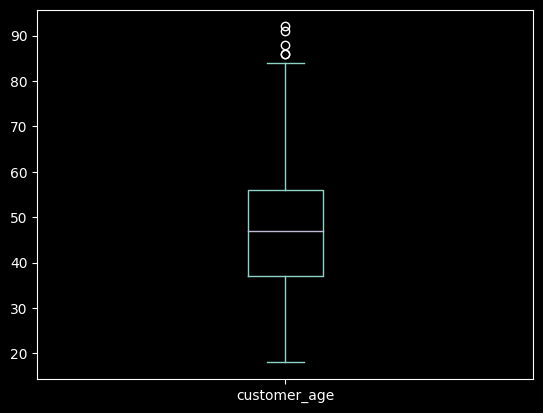

In [19]:
df_bank_tabular['customer_age'].plot(kind='box')
plt.show()

From the above boxplot for customer age, we can see that the median customer age is around 47, and there are a few outliers where age is more than 83 years.

The survey metrics such as convenience, customer service, fees charges etc. are ratings which lie between 1 to 5. As seen from their minimum and maximum values, there are no outliers in these fields.

#### Categorical data summaries

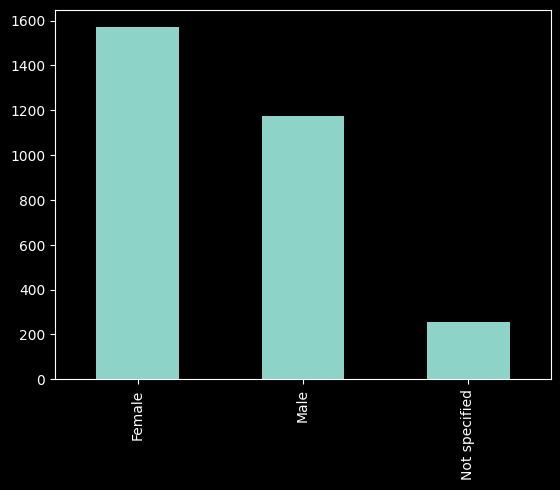

In [20]:
df_bank_tabular['customer_gender'].value_counts().plot.bar()
plt.show()

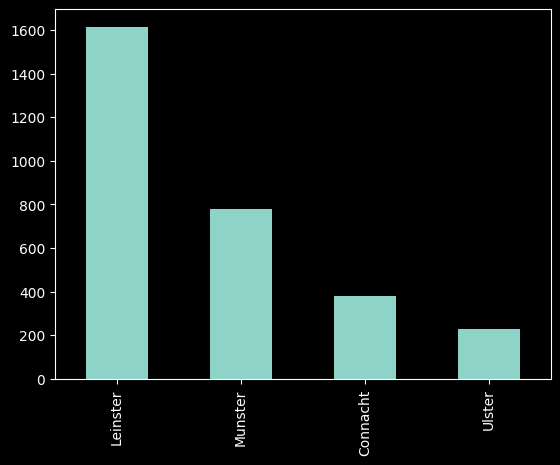

In [21]:
df_bank_tabular['customer_location'].value_counts().plot.bar()
plt.show()

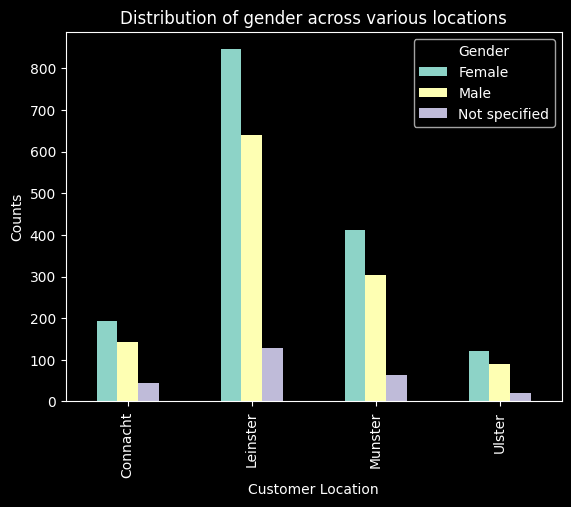

In [22]:
counts = df_bank_tabular.groupby(['customer_location', 'customer_gender']).size()

# pivot the table to create a separate column for each gender
counts = counts.unstack()

# create a bar plot of the counts
counts.plot(kind='bar')
plt.legend(title='Gender')
plt.xlabel('Customer Location')
plt.ylabel('Counts')
plt.title('Distribution of gender across various locations')
plt.show()

From the above figures, we can conclude that most of the bank's customers are females and belong to the Leinster location. Females are the most common customers across all the locations.

#### Credit card availability as per customer type

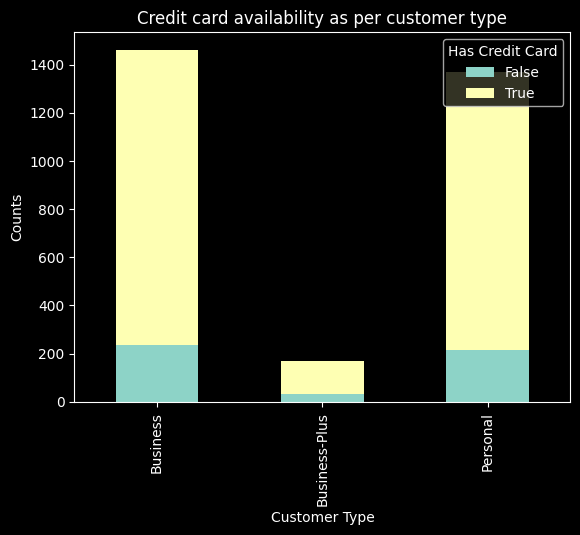

In [23]:
counts = df_bank_tabular.groupby(['customer_type', 'has_cc']).size()

# unstack the has_cc column to create a separate column for each unique value
counts = counts.unstack('has_cc')

# create a stacked bar plot of the counts
counts.plot(kind='bar', stacked=True)
plt.legend(title='Has Credit Card', loc='upper right')
plt.xlabel('Customer Type')
plt.ylabel('Counts')
plt.title('Credit card availability as per customer type')
plt.show()

From the above figure, we can see that the most common customer type is business customers, followed by personal and business-plus.

The figure also shows that businesses and personal customers account for most of the credit card users.

### Correlation plot

In [24]:
df_bank_tabular.corr()

,customer_id,customer_age,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
customer_id,1.000000,0.022850,-0.027289,0.012714,0.001724,0.016447,0.011860,-0.023962,0.002054,0.043390,0.010324,0.031588,-0.024810,0.020132
customer_age,0.022850,1.000000,-0.207534,-0.030280,0.000911,0.001295,0.147458,0.095938,0.053153,0.060453,-0.018452,-0.037498,0.038468,0.095319
has_cc,-0.027289,-0.207534,1.000000,-0.005424,0.004999,0.004262,-0.002613,-0.019032,-0.003038,0.012856,0.026693,0.029607,0.012653,-0.008327
has_mortgage,0.012714,-0.030280,-0.005424,1.000000,-0.109002,-0.120571,-0.165003,-0.234282,-0.167968,-0.034988,-0.038741,-0.044619,-0.069459,-0.444530
convenience,0.001724,0.000911,0.004999,-0.109002,1.000000,0.431624,0.280580,0.126158,0.169523,0.059111,0.058759,0.079755,0.110208,0.306499
customer_service,0.016447,0.001295,0.004262,-0.120571,0.431624,1.000000,0.253516,0.057945,0.053239,-0.012143,0.018190,0.025355,0.037957,0.209970
online_banking,0.011860,0.147458,-0.002613,-0.165003,0.280580,0.253516,1.000000,0.307519,0.210763,0.104013,0.077725,0.093356,0.205982,0.459840
interest_rates,-0.023962,0.095938,-0.019032,-0.234282,0.126158,0.057945,0.307519,1.000000,0.331156,0.106203,0.077036,0.072861,0.326868,0.351753
fees_charges,0.002054,0.053153,-0.003038,-0.167968,0.169523,0.053239,0.210763,0.331156,1.000000,0.241622,0.243520,0.231024,0.396086,0.333777
community_involvement,0.043390,0.060453,0.012856,-0.034988,0.059111,-0.012143,0.104013,0.106203,0.241622,1.000000,0.275318,0.300000,0.054014,0.226452


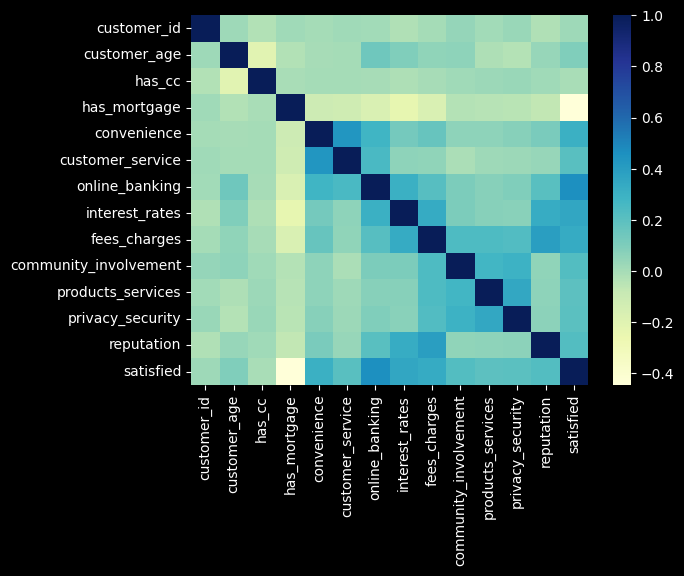

In [25]:
import seaborn as sns
dataplot = sns.heatmap(df_bank_tabular.corr(),  cmap="YlGnBu")

From the above correlation matrix, we can see that there is a strong positive correlation between online_banking and our target feature/predictor which is 'satisfied'. Infact, most of the survey metrics have some sort of positive correlation with 'satisfied', as compared to other features like has_cc and has_mortgage.

#### Temporal analysis

In [26]:
# calculate percentage of True values for each month
import calendar

df_bank_tabular['month'] = df_bank_tabular['date'].dt.month
result = df_bank_tabular.groupby('month')['satisfied'].mean() * 100
df_counts = df_bank_tabular.groupby(['month', 'satisfied']).size().reset_index(name='count')
df_pivot = df_counts.pivot(index='month', columns='satisfied', values='count')
df_pivot['Perc'] = round(result,2)

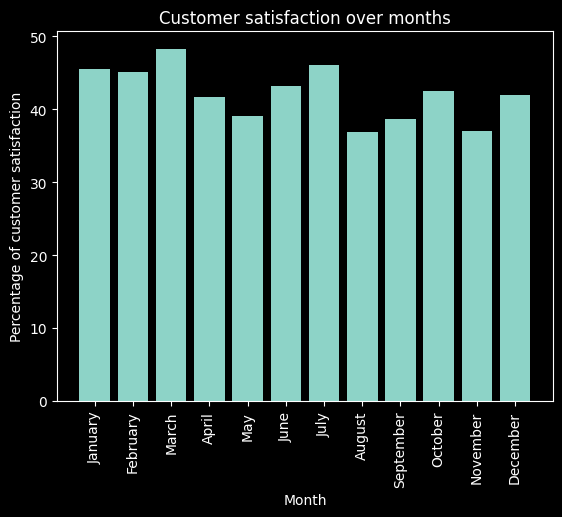

In [27]:
plt.bar(df_pivot.index, df_pivot['Perc'])
plt.ylabel('Percentage of customer satisfaction')
plt.xlabel('Month')
plt.xticks(df_pivot.index, [calendar.month_name[i] for i in df_pivot.index],rotation=90)
for i, v in enumerate(df_pivot['Perc']):
    plt.text(i+0.7, v+0.89, str(v), color='black', fontsize=7 )
plt.title('Customer satisfaction over months')
plt.show()

From the above chart, we can clearly see that the highest percentage of customer satisfaction is in the month of March. 

The general month-wise trend is that customer satisfaction is slightly higher during the winter months (December, January, February) as compared to summer months (May, June, July, August - with the exception of July).

In [28]:
# calculate percentage of True values for each month
import calendar

df_bank_tabular['year'] = df_bank_tabular['date'].dt.year
result = df_bank_tabular.groupby('year')['satisfied'].mean() * 100
df_counts = df_bank_tabular.groupby(['year', 'satisfied']).size().reset_index(name='count')
df_pivot = df_counts.pivot(index='year', columns='satisfied', values='count')
df_pivot['Perc'] = result

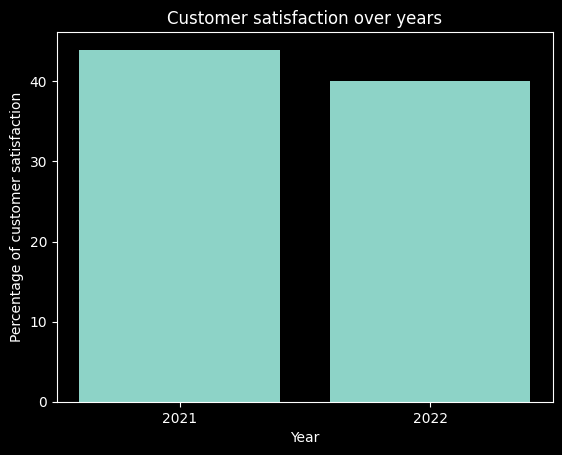

In [29]:
plt.bar(df_pivot.index.values, df_pivot['Perc'])
plt.ylabel('Percentage of customer satisfaction')
plt.xlabel('Year')
plt.xticks(df_pivot.index.values, df_pivot.index.values) 
plt.title('Customer satisfaction over years')
plt.show()

In [30]:
df_pivot

satisfied,False,True,Perc
year,,,
2021,881,691,43.956743
2022,856,572,40.056022


From the above barplot, we can see that overall the customer satisfaction percentage has decreased by a small margin (~4%)

### Task 3: Tabular Data Classification

The classification task is a binary classification task because we will try to predict customer satisfaction which can only take values as true or false.

In [31]:
df_bank_tabular['day'] = df_bank_tabular['date'].dt.day
df_bank_tabular['dow'] = df_bank_tabular['date'].dt.dayofweek

In [32]:
df_bank_tabular

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,...,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,month,year,day,dow
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,...,4.0,4.0,5.0,2.0,4.0,True,8,2022,22,0
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,...,5.0,4.0,4.0,5.0,5.0,True,11,2022,23,2
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,...,2.0,3.0,4.0,4.0,3.0,True,1,2022,21,4
3,58770,2022-03-13,Female,47.0,Leinster,Business,True,False,3.0,4.0,...,5.0,5.0,5.0,5.0,5.0,True,3,2022,13,6
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,...,2.0,2.0,4.0,5.0,2.0,False,8,2022,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,...,5.0,3.0,3.0,1.0,5.0,False,9,2021,23,3
2996,53418,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,...,2.0,2.0,2.0,2.0,3.0,True,3,2021,7,6
2997,79364,2021-08-01,Male,47.0,Munster,Personal,True,True,3.0,3.0,...,4.0,3.0,4.0,4.0,4.0,False,8,2021,1,6
2998,371134,2021-06-25,Male,42.0,Leinster,Business,False,False,3.0,2.0,...,4.0,4.0,3.0,4.0,1.0,True,6,2021,25,4


In [33]:
df_bank_tabular.columns

Index(['customer_id', 'date', 'customer_gender', 'customer_age',
       'customer_location', 'customer_type', 'has_cc', 'has_mortgage',
       'convenience', 'customer_service', 'online_banking', 'interest_rates',
       'fees_charges', 'community_involvement', 'products_services',
       'privacy_security', 'reputation', 'satisfied', 'month', 'year', 'day',
       'dow'],
      dtype='object')

Defining the categorical as well as numeric column names. These list variables will be used during feature pre-processing.

In [34]:
categorical_non_ordinal_columns = ['customer_gender',
                       'customer_location',
                       'customer_type',
                       'has_cc',
                       'has_mortgage']

categorical_ordinal_columns = ['convenience', 
                     'customer_service', 
                     'online_banking', 
                     'interest_rates',
                     'fees_charges', 
                     'community_involvement', 
                     'products_services',
                     'privacy_security', 
                     'reputation']

numerical_columns = ['customer_age',
                     'month', 
                     'year', 
                     'day',
                     'dow']

In [35]:
features = categorical_non_ordinal_columns + categorical_ordinal_columns + numerical_columns

'X' are all the input features. 

'y', which is our target variable, is the 'satisfied' column

In [36]:
X = df_bank_tabular[features]
y = df_bank_tabular['satisfied']

#### Feature transformations

We need to ensure that all features are in the correct range as well as type so that they can be compatible and well-fit to the classification algorithm later on.

This would include two tasks:

1. <b>Scaling numerical features</b> - Ensuring that all numerical columns are scaled appropriately so that the classification algorithm does not consider some numerical columns more important than others, based on their magnitude

2. <b>Encoding categorical features</b> - Since the algorithm expects numeric input, it is necessary to convert categorical/string columns to numeric. But in our data, we have ordinal columns such as the ratings columns. Therefore, we would be using Ordinal encoder to handle these.

#### Scaling numerical features

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X[numerical_columns] = sc.fit_transform(X[numerical_columns])

#### Encoding categorical features - Non ordinal columns

In [39]:
categorical_non_ordinal_columns

['customer_gender',
 'customer_location',
 'customer_type',
 'has_cc',
 'has_mortgage']

In [40]:
X

,customer_gender,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,customer_age,month,year,day,dow
0,Male,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,0.205278,0.475624,1.049209,0.745446,-1.462360
1,Female,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,1.022726,1.381000,1.049209,0.859656,-0.469583
2,Female,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,3.0,4.0,4.0,3.0,1.171353,-1.636919,1.049209,0.631236,0.523193
3,Female,Leinster,Business,True,False,3.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,-0.017662,-1.033335,1.049209,-0.282440,1.515970
4,Female,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,-0.463542,0.475624,1.049209,-0.853488,-1.462360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,-0.463542,0.777416,-0.953099,0.859656,0.026805
2996,Female,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,0.725473,-1.033335,-0.953099,-0.967698,1.515970
2997,Male,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,-0.017662,0.475624,-0.953099,-1.652955,1.515970
2998,Male,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,-0.389229,-0.127960,-0.953099,1.088075,0.523193


In [41]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding using pandas.get_dummies
one_hot_encoded = pd.get_dummies(X, columns=['customer_gender',
                       'customer_location',
                       'customer_type',
                       'has_cc',
                       'has_mortgage'])

# Update the original dataframe with the one-hot encoded columns
X = pd.concat([X, one_hot_encoded], axis=1)

In [42]:
X.drop(columns=categorical_non_ordinal_columns, inplace=True)

#### Encoding categorical features - Ordinal columns

In [43]:
from sklearn.preprocessing import OrdinalEncoder

oe_object = OrdinalEncoder()
X[categorical_ordinal_columns] = oe_object.fit_transform(X[categorical_ordinal_columns])

### Model evaluation strategy

For evaluating different classification models, I would keep track of accuracy, precision, recall and f1 score along with the total training time taken for each of the models and store these metrics in a pandas dataframe.

The evaluation dataframe would have the following structure:


| Model Name | Model Parameters | Dataset Type | Accuracy | Precision | Recall | F1 Score | Training Time |
| --- | --- | --- | --- | --- | --- | --- | --- |

- In terms of train/test sets, it'll be a 80-20 train-test split for each of the models, with a random state of 42 for result reproducibility.

- Each classification algorithm has its own set of hyper-parameters that may be tuned. E.g Number of neighbors & distance metric. These will be stored in the model parameters column and would be considered during hyper-parameter tuning

- Hyper-parameter tuning will be done using GridSearchCV

In [44]:
evaluation_results = pd.DataFrame(columns=[
    'Model Name', 'Model Parameters', 'Dataset Type','Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time(s)'
])

# All results will be stored in these lists and finally used to update the above dataframe
model_name = []
model_parameters = []
dataset_type = []
accuracy_scores_list = []
precision_scores_list = []
recall_scores_list = []
f1_scores_list = []
training_time_list = []

In [45]:
evaluation_results

,Model Name,Model Parameters,Dataset Type,Accuracy,Precision,Recall,F1 Score,Training Time(s)


#### Imports

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import time

### KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

#### Training the KNN model

In [48]:
# Divide dataset into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

knn_model_tab = KNeighborsClassifier()

# Defining the hyper-parameter grid for K-nearest neighbors
param_grid = {'n_neighbors': [2, 3, 4],
              'metric': ['chebyshev', 'euclidean', 'manhattan']}

grid_search = GridSearchCV(estimator=knn_model_tab,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")

# Ftting the KNN model using the best hyper-parameters
knn_model_tab_tuned = KNeighborsClassifier(**grid_search.best_params_)

start = time.time()
knn_model_tab_tuned.fit(X_train, y_train)
end = time.time()
time_taken = round(end-start,6)
print(f"Training time: {time_taken} seconds")

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4}
Best mean cross-validation score: 0.815
Training time: 0.001142 seconds


#### Evaluation of KNN model

In [49]:
y_pred = knn_model_tab_tuned.predict(X_test)
print('KNN results (tabular dataset)\n----------------------------------------')
print('Model parameters:', grid_search.best_params_)
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision score:', round(precision_score(y_test, y_pred), 2))
print('Recall score:', round(recall_score(y_test, y_pred), 2))
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Training Time:', time_taken, 'seconds')


model_name.append('K-Nearest Neighbor Classifier')
model_parameters.append(grid_search.best_params_)
dataset_type.append('Tabular')
accuracy_scores_list.append(round(accuracy_score(y_test, y_pred), 2))
precision_scores_list.append(round(precision_score(y_test, y_pred), 2))
recall_scores_list.append(round(recall_score(y_test, y_pred), 2))
f1_scores_list.append(round(f1_score(y_test, y_pred), 2))
training_time_list.append(time_taken)

KNN results (tabular dataset)
----------------------------------------
Model parameters: {'metric': 'manhattan', 'n_neighbors': 4}
Accuracy score: 0.81
Precision score: 0.86
Recall score: 0.64
F1 Score: 0.74
Training Time: 0.001142 seconds


### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

#### Training the decision tree model

In [51]:
# Divide dataset into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

d_tree_model_tab = DecisionTreeClassifier()

# Defining the hyper-parameter grid for K-nearest neighbors
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=d_tree_model_tab,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")

# Ftting the KNN model using the best hyper-parameters
d_tree_model_tab_tuned = DecisionTreeClassifier(**grid_search.best_params_)

start = time.time()
d_tree_model_tab_tuned.fit(X_train, y_train)
end = time.time()
time_taken = round(end-start,6)
print(f"Training time: {time_taken} seconds")

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 15}
Best mean cross-validation score: 0.854
Training time: 0.008209 seconds


#### Evaluation of decision tree model

In [52]:
y_pred = d_tree_model_tab_tuned.predict(X_test)
print('Decision Tree (tabular dataset) results\n----------------------------------------')
print('Model parameters:', grid_search.best_params_)
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision score:', round(precision_score(y_test, y_pred), 2))
print('Recall score:', round(recall_score(y_test, y_pred), 2))
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Training Time:', time_taken, 'seconds')


model_name.append('Decision Tree Classifier')
model_parameters.append(grid_search.best_params_)
dataset_type.append('Tabular')
accuracy_scores_list.append(round(accuracy_score(y_test, y_pred), 2))
precision_scores_list.append(round(precision_score(y_test, y_pred), 2))
recall_scores_list.append(round(recall_score(y_test, y_pred), 2))
f1_scores_list.append(round(f1_score(y_test, y_pred), 2))
training_time_list.append(time_taken)

Decision Tree (tabular dataset) results
----------------------------------------
Model parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 15}
Accuracy score: 0.84
Precision score: 0.8
Recall score: 0.81
F1 Score: 0.8
Training Time: 0.008209 seconds


### Naive Bayes Classifier

#### Training the Gaussian Naive Bayes model 

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
# Divide dataset into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


gnb_model_tab = GaussianNB()

# Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.25, 0.25, 0.5], [0.1, 0.4, 0.5]]
}

grid_search = GridSearchCV(estimator=gnb_model_tab,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")

# Ftting the KNN model using the best hyper-parameters
gnb_model_tab_tuned = GaussianNB(**grid_search.best_params_)

start = time.time()
gnb_model_tab_tuned.fit(X_train, y_train)
end = time.time()
time_taken = round(end-start,6)
print(f"Training time: {time_taken} seconds")

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best hyperparameters: {'priors': None, 'var_smoothing': 1e-09}
Best mean cross-validation score: 0.824
Training time: 0.001259 seconds


#### Evaluation of Gaussian Naive Bayes model

In [55]:
y_pred = gnb_model_tab_tuned.predict(X_test)
print('Gaussian Naive Bayes(tabular dataset) results\n----------------------------------------')
print('Model parameters:', grid_search.best_params_)
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision score:', round(precision_score(y_test, y_pred), 2))
print('Recall score:', round(recall_score(y_test, y_pred), 2))
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Training Time:', time_taken, 'seconds')


model_name.append('Gaussian Naive Bayes Classifier')
model_parameters.append(grid_search.best_params_)
dataset_type.append('Tabular')
accuracy_scores_list.append(round(accuracy_score(y_test, y_pred), 2))
precision_scores_list.append(round(precision_score(y_test, y_pred), 2))
recall_scores_list.append(round(recall_score(y_test, y_pred), 2))
f1_scores_list.append(round(f1_score(y_test, y_pred), 2))
training_time_list.append(time_taken)

Gaussian Naive Bayes(tabular dataset) results
----------------------------------------
Model parameters: {'priors': None, 'var_smoothing': 1e-09}
Accuracy score: 0.84
Precision score: 0.79
Recall score: 0.86
F1 Score: 0.82
Training Time: 0.001259 seconds


### Updating the evaluation dataframe with the results

In [56]:
evaluation_results['Model Name'] = model_name
evaluation_results['Model Parameters'] = model_parameters
evaluation_results['Dataset Type'] = dataset_type
evaluation_results['Accuracy'] = accuracy_scores_list
evaluation_results['Precision'] = precision_scores_list
evaluation_results['Recall'] = recall_scores_list
evaluation_results['F1 Score'] = f1_scores_list
evaluation_results['Training Time(s)'] = training_time_list

In [57]:
evaluation_results

,Model Name,Model Parameters,Dataset Type,Accuracy,Precision,Recall,F1 Score,Training Time(s)
0,K-Nearest Neighbor Classifier,"{'metric': 'manhattan', 'n_neighbors': 4}",Tabular,0.81,0.86,0.64,0.74,0.001142
1,Decision Tree Classifier,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",Tabular,0.84,0.80,0.81,0.80,0.008209
2,Gaussian Naive Bayes Classifier,"{'priors': None, 'var_smoothing': 1e-09}",Tabular,0.84,0.79,0.86,0.82,0.001259


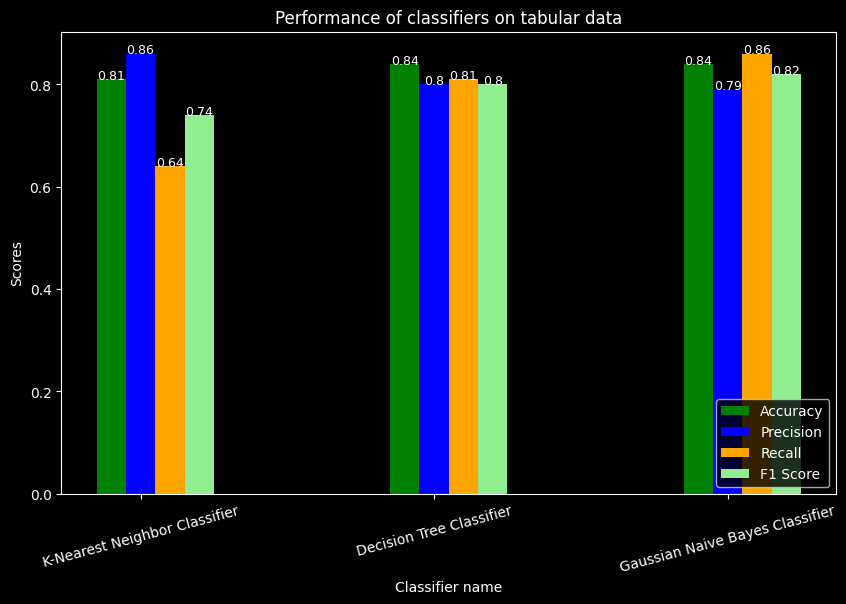

In [58]:
# Set the figure size
fig = plt.figure(figsize=(10, 6))

# Set the X-axis label
plt.xlabel('Classifier name')

# Set the Y-axis label
plt.ylabel('Scores')

# Set the title of the chart
plt.title('Performance of classifiers on tabular data')

# Set the bar width
width = 0.1

# Set the positions of the bars on the X-axis
pos_A = list(range(len(evaluation_results['Model Name'])))
pos_B = [x + width for x in pos_A]
pos_C = [x + width for x in pos_B]
pos_D = [x + width for x in pos_C]

# Plot the bars
plt.bar(pos_A, evaluation_results['Accuracy'], width, color='green', label='Accuracy')
plt.bar(pos_B, evaluation_results['Precision'], width, color='blue', label='Precision')
plt.bar(pos_C, evaluation_results['Recall'], width, color='orange', label='Recall')
plt.bar(pos_D, evaluation_results['F1 Score'], width, color='lightgreen', label='F1 Score')

# Add the bar values on top of each bar
for i, v in enumerate(evaluation_results['Accuracy']):
    plt.text(pos_A[i], v, str(v), ha='center',fontsize=9)
for i, v in enumerate(evaluation_results['Precision']):
    plt.text(pos_B[i], v, str(v), ha='center',fontsize=9)
for i, v in enumerate(evaluation_results['Recall']):
    plt.text(pos_C[i], v, str(v), ha='center',fontsize=9)
for i, v in enumerate(evaluation_results['F1 Score']):
    plt.text(pos_D[i], v, str(v), ha='center',fontsize=9)

# Set the X-axis tick labels
plt.xticks([i + width for i in pos_A], evaluation_results['Model Name'], rotation=15)

# Add the legend
plt.legend(loc='lower right')

# Display the chart
plt.show()

Based on the above results, we can conclude that:

1. In terms of accuracy, the decision tree classifier and gaussian naive bayes classifier have almost the equal performance(~84% accuracy)


2. Although there is a slight class imbalance in customer satisfaction, if we consider the F1 score as a metric, then gaussian naive bayes classifier is our top choice.


3. Between decision tree and naive bayes, the latter performs better in two evaluation metrics (recall and f1 score) and almost the same for accuracy and precision. Therefore, considering these scenarios, the gaussian naive bayes classifier is best suited for the classification task for the tabular data.

### Task 4: Text Data Classification

Text data (bank-comments.csv) which contains short textual comments indicating customers' opinions regarding the bank.

In [59]:
df_bank_comments = pd.read_csv('bank-data/bank-comments.csv', sep='\t')

In [60]:
df_bank_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  3000 non-null   int64 
 1   date         3000 non-null   object
 2   comments     2485 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [61]:
df_bank_comments.sort_values(by='comments')[:50]

,customer_id,date,comments
1195,219193,2021-03-19,( no coment )
2436,196435,2022-02-18,( no coment )
1660,231214,2021-03-13,( no coment ). ..
805,295467,2021-02-12,( no coment )..
1553,319198,2022-12-04,(no comment)
1967,211612,2022-07-04,(no comment)
969,384682,2021-10-12,(no comment)
371,119178,2021-10-27,(no comment)
891,159839,2022-12-22,(no comment)
2719,10407,2022-04-18,(no comment)...


As we can see from above, there are a lot of various of missing and irrelevant values such as 'no comment', 'prefer not to comment', (no coment) and so on.

For this kind of problem, I am going to use regular expressions to filter out such data points.

#### Convert comments column to lowercase and strip whitspaces, hyphens and tabs

In [62]:
df_bank_comments['comments'] = df_bank_comments['comments'].str.lower()
df_bank_comments['comments'] = df_bank_comments['comments'].str.strip()
df_bank_comments['comments'] = df_bank_comments['comments'].str.strip('\t')
df_bank_comments['comments'] = df_bank_comments['comments'].str.strip('----')

#### Removing the records in the text data which has missing or irrelevant values

In [63]:
# Regular expression pattern
pattern = r'\b(comments|northing|nothing|coment|comment|nothing to add|northing to say|no. comment|not to coment|nothing to say|no comment|no coment|no comments|nothing else|nothing to add|none|NaN|nan|not applicable)\b'

# Extract records based on pattern
mask = df_bank_comments['comments'].str.contains(pattern, na=True)
result = df_bank_comments[mask]

In [64]:
df_bank_comments = df_bank_comments[~mask]

In [65]:
df_bank_comments[0:60]

,customer_id,date,comments
0,216604,2022-08-22,"overal, this bank is satisfactory."
1,259276,2022-11-23,easy to find zhe bank ' s branches and atms. a...
2,265459,2022-01-21,bank's phone app is really great. in general a...
6,380865,2022-11-20,seriously considerin switching to a rival bank..
8,219361,2021-09-25,i guess that my bank is committed to sustainab...
9,304040,2021-02-02,its time für your bank to make meaningful chan...
10,314559,2021-01-06,banks webside is qute user friendly * fairly g...
11,932,2021-02-27,bank branches are really easy to find * in gen...
12,299011,2022-01-16,"monthly fees charged by this bank are reasonable,"
13,312976,2021-06-21,it' ' s important ho me that my bank is [[comm...


#### Removing all special characters in the text

In [66]:
df_bank_comments['comments'] = df_bank_comments['comments'].replace('[^\w\s]+', '', regex=True)

#### Lemmatizing all text

In [68]:
from nltk.stem import WordNetLemmatizer
import nltk
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a string
def lemmatize_text(text):
    
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    # Lemmatize each word
    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join lemmatized words into a string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

# Apply lemmatize_text function to 'text' column
df_bank_comments['comments'] = df_bank_comments['comments'].apply(lemmatize_text)

#### Remove single characters and numbers

In [69]:
df_bank_comments['comments'] = df_bank_comments['comments'].replace(r'\b\w\b|\d+', '', regex=True)

#### Remove all words which do not exist in the English vocabulary

In [70]:
from nltk.corpus import words
nltk.download('words')
english_words = set(words.words())

df_bank_comments['comments'] = df_bank_comments['comments'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() in english_words]))

[nltk_data] Downloading package words to
[nltk_data]     /Users/abhishekdutta/nltk_data...
[nltk_data]   Package words is already up-to-date!


#### Fetching the satisfied column from tabular data by joining on customer_id

In [71]:
df_bank_comments_merged = pd.merge(
    df_bank_comments[['customer_id','date','comments']], df_bank_tabular[['customer_id','satisfied']], 
    on='customer_id', how='inner')

In [72]:
df_bank_comments_merged

,customer_id,date,comments,satisfied
0,216604,2022-08-22,this bank is satisfactory,True
1,259276,2022-11-23,easy to find bank branch and all in happy with...,True
2,265459,2022-01-21,bank phone is really great in general good opt...,True
3,380865,2022-11-20,seriously switching to rival bank,False
4,219361,2021-09-25,guess that my bank is to and it carbon emissio...,True
...,...,...,...,...
2235,90111,2021-05-22,more financial product are for people like me ...,False
2236,53418,2021-03-07,banking is really good,True
2237,79364,2021-08-01,customer service quality from this bank is ter...,False
2238,371134,2021-06-25,great to see that my bank support local sport ...,True


#### Train the Gaussian Naive Bayes classifier on the merged text dataset

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_bank_comments_merged['comments']
y = df_bank_comments_merged['satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#vectorizer = CountVectorizer(stop_words="english")
#testing_vector = vectorizer.fit_transform(X_train)

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

gnb_model_text = GaussianNB()


# Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.25, 0.25, 0.5], [0.1, 0.4, 0.5]]
}

grid_search = GridSearchCV(estimator=gnb_model_text,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_tfidf, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")

# Ftting the KNN model using the best hyper-parameters
gnb_model_text_tuned = GaussianNB(**grid_search.best_params_)

start = time.time()
gnb_model_text_tuned.fit(X_train_tfidf, y_train)
end = time.time()
time_taken = round(end-start,6)
print(f"Training time: {time_taken} seconds")

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best hyperparameters: {'priors': None, 'var_smoothing': 1e-06}
Best mean cross-validation score: 0.905
Training time: 0.007538 seconds


#### Evaluate the model

In [74]:
y_pred = gnb_model_text_tuned.predict(X_test_tfidf)
print('Gaussian Naive Bayes(text data) results\n----------------------------------------')
print('Model parameters:', grid_search.best_params_)
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision score:', round(precision_score(y_test, y_pred), 2))
print('Recall score:', round(recall_score(y_test, y_pred), 2))
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Training Time:', time_taken, 'seconds')


model_name.append('Gaussian Naive Bayes Classifier')
model_parameters.append(grid_search.best_params_)
dataset_type.append('Text')
accuracy_scores_list.append(round(accuracy_score(y_test, y_pred), 2))
precision_scores_list.append(round(precision_score(y_test, y_pred), 2))
recall_scores_list.append(round(recall_score(y_test, y_pred), 2))
f1_scores_list.append(round(f1_score(y_test, y_pred), 2))
training_time_list.append(time_taken)

Gaussian Naive Bayes(text data) results
----------------------------------------
Model parameters: {'priors': None, 'var_smoothing': 1e-06}
Accuracy score: 0.93
Precision score: 0.87
Recall score: 0.98
F1 Score: 0.92
Training Time: 0.007538 seconds


#### Training KNN Classifier on the merged text dataset

In [75]:
X = df_bank_comments_merged['comments']
y = df_bank_comments_merged['satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#vectorizer = CountVectorizer(stop_words="english")
#testing_vector = vectorizer.fit_transform(X_train)

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

knn_model_text = KNeighborsClassifier()


# Defining the hyper-parameter grid for K-nearest neighbors
param_grid = {'n_neighbors': [2, 3, 4],
              'metric': ['chebyshev', 'euclidean', 'manhattan']}

grid_search = GridSearchCV(estimator=knn_model_text,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_tfidf, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")

# Ftting the KNN model using the best hyper-parameters
knn_model_text_tuned = KNeighborsClassifier(**grid_search.best_params_)

start = time.time()
knn_model_text_tuned.fit(X_train_tfidf, y_train)
end = time.time()
time_taken = round(end-start,6)
print(f"Training time: {time_taken} seconds")

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best mean cross-validation score: 0.946
Training time: 0.001084 seconds


In [76]:
y_pred = knn_model_text_tuned.predict(X_test_tfidf)
print('KNN (text) results\n----------------------------------------')
print('Model parameters:', grid_search.best_params_)
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision score:', round(precision_score(y_test, y_pred), 2))
print('Recall score:', round(recall_score(y_test, y_pred), 2))
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Training Time:', time_taken, 'seconds')


model_name.append('K-Nearest Neighbor Classifier')
model_parameters.append(grid_search.best_params_)
dataset_type.append('Text')
accuracy_scores_list.append(round(accuracy_score(y_test, y_pred), 2))
precision_scores_list.append(round(precision_score(y_test, y_pred), 2))
recall_scores_list.append(round(recall_score(y_test, y_pred), 2))
f1_scores_list.append(round(f1_score(y_test, y_pred), 2))
training_time_list.append(time_taken)

KNN (text) results
----------------------------------------
Model parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Accuracy score: 0.95
Precision score: 0.96
Recall score: 0.93
F1 Score: 0.95
Training Time: 0.001084 seconds


#### Training the decision tree classifier on merged text data

In [77]:
X = df_bank_comments_merged['comments']
y = df_bank_comments_merged['satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#vectorizer = CountVectorizer(stop_words="english")
#testing_vector = vectorizer.fit_transform(X_train)

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

dtree_model_text = DecisionTreeClassifier()


# Defining the hyper-parameter grid for K-nearest neighbors
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dtree_model_text,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_tfidf, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")

# Ftting the KNN model using the best hyper-parameters
dtree_model_text_tuned = DecisionTreeClassifier(**grid_search.best_params_)

start = time.time()
dtree_model_text_tuned.fit(X_train_tfidf, y_train)
end = time.time()
time_taken = round(end-start,6)
print(f"Training time: {time_taken} seconds")

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}
Best mean cross-validation score: 0.797
Training time: 0.019413 seconds


In [78]:
y_pred = dtree_model_text_tuned.predict(X_test_tfidf)
print('Decision Tree (text data) results\n----------------------------------------')
print('Model parameters:', grid_search.best_params_)
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision score:', round(precision_score(y_test, y_pred), 2))
print('Recall score:', round(recall_score(y_test, y_pred), 2))
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Training Time:', time_taken, 'seconds')


model_name.append('Decision Tree Classifier')
model_parameters.append(grid_search.best_params_)
dataset_type.append('Text')
accuracy_scores_list.append(round(accuracy_score(y_test, y_pred), 2))
precision_scores_list.append(round(precision_score(y_test, y_pred), 2))
recall_scores_list.append(round(recall_score(y_test, y_pred), 2))
f1_scores_list.append(round(f1_score(y_test, y_pred), 2))
training_time_list.append(time_taken)

Decision Tree (text data) results
----------------------------------------
Model parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}
Accuracy score: 0.78
Precision score: 0.92
Recall score: 0.56
F1 Score: 0.69
Training Time: 0.019413 seconds


In [79]:
evaluation_results = evaluation_results.iloc[0:0]

In [80]:
evaluation_results['Model Name'] = model_name
evaluation_results['Model Parameters'] = model_parameters
evaluation_results['Dataset Type'] = dataset_type
evaluation_results['Accuracy'] = accuracy_scores_list
evaluation_results['Precision'] = precision_scores_list
evaluation_results['Recall'] = recall_scores_list
evaluation_results['F1 Score'] = f1_scores_list
evaluation_results['Training Time(s)'] = training_time_list

In [81]:
evaluation_results

,Model Name,Model Parameters,Dataset Type,Accuracy,Precision,Recall,F1 Score,Training Time(s)
0,K-Nearest Neighbor Classifier,"{'metric': 'manhattan', 'n_neighbors': 4}",Tabular,0.81,0.86,0.64,0.74,0.001142
1,Decision Tree Classifier,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",Tabular,0.84,0.80,0.81,0.80,0.008209
2,Gaussian Naive Bayes Classifier,"{'priors': None, 'var_smoothing': 1e-09}",Tabular,0.84,0.79,0.86,0.82,0.001259
3,Gaussian Naive Bayes Classifier,"{'priors': None, 'var_smoothing': 1e-06}",Text,0.93,0.87,0.98,0.92,0.007538
4,K-Nearest Neighbor Classifier,"{'metric': 'euclidean', 'n_neighbors': 3}",Text,0.95,0.96,0.93,0.95,0.001084
5,Decision Tree Classifier,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",Text,0.78,0.92,0.56,0.69,0.019413


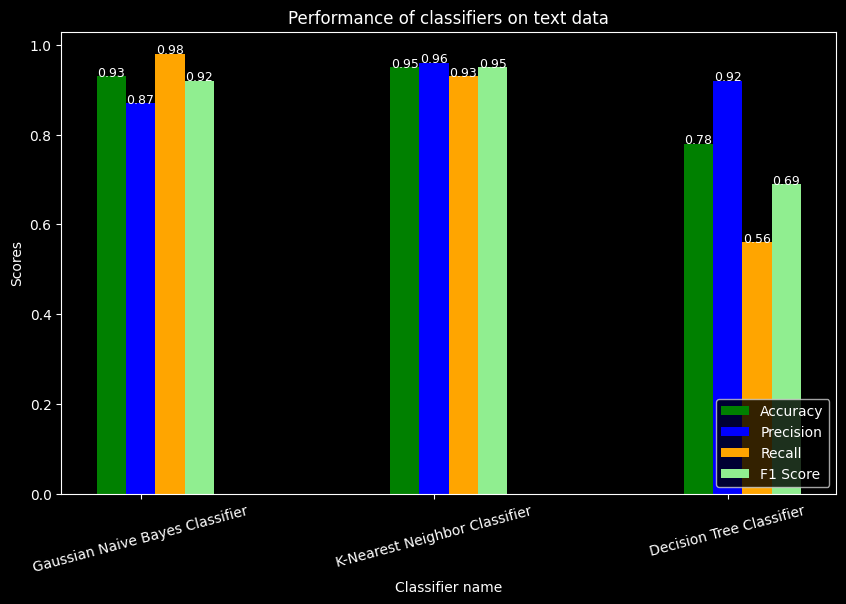

In [82]:
tmp = evaluation_results[evaluation_results['Dataset Type']=='Text']

# Set the figure size
fig = plt.figure(figsize=(10, 6))

# Set the X-axis label
plt.xlabel('Classifier name')

# Set the Y-axis label
plt.ylabel('Scores')

# Set the title of the chart
plt.title('Performance of classifiers on text data')

# Set the bar width
width = 0.1

# Set the positions of the bars on the X-axis
pos_A = list(range(len(tmp['Model Name'].unique())))
pos_B = [x + width for x in pos_A]
pos_C = [x + width for x in pos_B]
pos_D = [x + width for x in pos_C]

# Plot the bars
plt.bar(pos_A, tmp['Accuracy'], width, color='green', label='Accuracy')
plt.bar(pos_B, tmp['Precision'], width, color='blue', label='Precision')
plt.bar(pos_C, tmp['Recall'], width, color='orange', label='Recall')
plt.bar(pos_D, tmp['F1 Score'], width, color='lightgreen', label='F1 Score')

# Add the bar values on top of each bar
for i, v in enumerate(tmp['Accuracy']):
    plt.text(pos_A[i], v, str(v), ha='center',fontsize=9)
for i, v in enumerate(tmp['Precision']):
    plt.text(pos_B[i], v, str(v), ha='center',fontsize=9)
for i, v in enumerate(tmp['Recall']):
    plt.text(pos_C[i], v, str(v), ha='center',fontsize=9)
for i, v in enumerate(tmp['F1 Score']):
    plt.text(pos_D[i], v, str(v), ha='center',fontsize=9)

# Set the X-axis tick labels
plt.xticks([i + width for i in pos_A], tmp['Model Name'], rotation=15)

# Add the legend
plt.legend(loc='lower right')

# Display the chart
plt.show()

As per the above results for the text classification task, we can conclude that:

1. K-Nearest Neighbors has outperformed the other two classification models for the text classification purpose. 


2. K-Nearest Neighbors also takes the least amount of time for training 


3. In terms of F1 score, KNN outperforms decision tree classifier by a large margin and naive bayes by a small margin. Hence, KNN is best suited for this particular text classification task overall.

### Task 5: Conclusions

1. For the classification of tabular data, gaussian naive baye's was our best choice with an accuracy of about 84%, F1 score of 82% and minimal training time.


2. For the classification of text data, k-nearest neighbors was our best choice with an accuracy of about 95%, F1 score of 95% and minimal training time.


3. Based on the above results, we can say that the text representation is clearly more suitable for determining the customer satisfaction based on survey results. None of the models that were run on the tabular data could provide an accuracy or F1 score of more than 90%


4. Data pre-processing for the text data was much more complicated than tabular data, because of a variety of possibilities in the comments provided. 


5. Since the dataset wasn't very large in both types of representations, the training times were in the order of milliseconds and less, but KNN took the least training time in both scenarios because of its simplicity.


6. Decision Trees are known to overfit, especially when there are too many features in the model. Therefore it has not performed well at all in the text classification.

<b> Insights from analysis </b>

1. There were many missing values in the tabular dataset especially across the survey metrics such as convenience, reputation etc.


2. Females responded to the survey more than males. In terms of location, Leinster had the most number of customers.


3. Percentage of satisfied customers has dropped slightly from 2021 to 2022.


4. Survey result for online banking, convenience, fees charges and interest rates showed the highest amount of positive correlation with customer satisfaction


<b> Challenges faced <b>
    
1. The pre-processing of text data was a big challenge due to the variety of missing/irrelevant values in the comments provided. I had to manually look for variations and account for them while preparing my regular expression.
    
    
2. Dealing with missing values for the survey metrics was a bit tricky as well since they were discrete values ranging from 1 to 5. The missing values were imputed based on average value and it was rounded off to fit the existing format.
    
    
<b> Ideas for further analysis/classification <b>
    
1. The machine learning steps for both kinds of data could be converted to pipelines
    
    
2. Feature engineering should be implemented to reduce the dimensionality of data especially for text classification and to improve model performance
    
    
3. More amount of data should be collected and ingested into analysis and classification models so that we may have a better representation of customer viewpoints.